<a href="https://colab.research.google.com/github/hikaru-okinawa/virtual-currency_pred/blob/main/virtual_currency_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##仮想通貨の価格予測
--------------------------




##ライブラリーをインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

##データのインポート
----------------

In [ ]:
btc_df = yf.download('BTC-USD', start='2018-01-01', end=None, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
btc_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,49920425401
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853
2024-04-22,64935.632812,67233.960938,64548.179688,66837.679688,66837.679688,28282686673
2024-04-23,66845.789062,67199.242188,66015.617188,66290.992188,66290.992188,24751968256


In [ ]:
#追加
btc_df["Date"] = btc_df.index
btc_df = btc_df.reset_index(drop=True)
btc_df = btc_df.drop("Volume", axis=1)
btc_df_tmp = btc_df.drop("Date",axis=1)
btc_df.tail()

,Open,High,Low,Close,Adj Close,Date
2300,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,2024-04-19
2301,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,2024-04-20
2302,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,2024-04-21
2303,64935.632812,67233.960938,64548.179688,66837.679688,66837.679688,2024-04-22
2304,66845.789062,67199.242188,66015.617188,66290.992188,66290.992188,2024-04-23


##欠損値の確認・データ型の確認
--------------------

In [ ]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       2305 non-null   float64       
 1   High       2305 non-null   float64       
 2   Low        2305 non-null   float64       
 3   Close      2305 non-null   float64       
 4   Adj Close  2305 non-null   float64       
 5   Date       2305 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 108.2 KB


In [ ]:
# Adj Close と　Volume　列の削除
btc_df = btc_df.drop(columns=['Adj Close'])

##データの可視化
----

<Axes: >

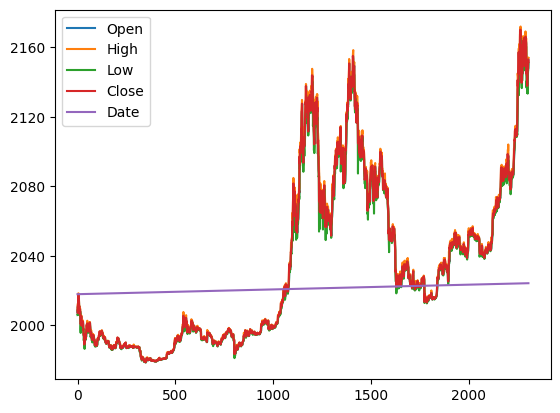

In [ ]:
btc_df.plot()

##曜日情報の取得

In [ ]:
btc_df['weekday'] = btc_df['Date'].dt.weekday
btc_df

,Open,High,Low,Close,Date,weekday
0,14112.200195,14112.200195,13154.700195,13657.200195,2018-01-01,0
1,13625.000000,15444.599609,13163.599609,14982.099609,2018-01-02,1
2,14978.200195,15572.799805,14844.500000,15201.000000,2018-01-03,2
3,15270.700195,15739.700195,14522.200195,15599.200195,2018-01-04,3
4,15477.200195,17705.199219,15202.799805,17429.500000,2018-01-05,4
...,...,...,...,...,...,...
2300,63510.750000,65481.597656,59651.390625,63843.570312,2024-04-19,4
2301,63851.101562,65442.457031,63172.402344,64994.441406,2024-04-20,5
2302,64992.816406,65723.242188,64277.722656,64926.644531,2024-04-21,6
2303,64935.632812,67233.960938,64548.179688,66837.679688,2024-04-22,0


##目的変数の追加
---------

In [ ]:
btc_df['next_High'] = btc_df['High'].shift(-1)
btc_df

,Open,High,Low,Close,Date,weekday,next_High
0,14112.200195,14112.200195,13154.700195,13657.200195,2018-01-01,0,15444.599609
1,13625.000000,15444.599609,13163.599609,14982.099609,2018-01-02,1,15572.799805
2,14978.200195,15572.799805,14844.500000,15201.000000,2018-01-03,2,15739.700195
3,15270.700195,15739.700195,14522.200195,15599.200195,2018-01-04,3,17705.199219
4,15477.200195,17705.199219,15202.799805,17429.500000,2018-01-05,4,17712.400391
...,...,...,...,...,...,...,...
2300,63510.750000,65481.597656,59651.390625,63843.570312,2024-04-19,4,65442.457031
2301,63851.101562,65442.457031,63172.402344,64994.441406,2024-04-20,5,65723.242188
2302,64992.816406,65723.242188,64277.722656,64926.644531,2024-04-21,6,67233.960938
2303,64935.632812,67233.960938,64548.179688,66837.679688,2024-04-22,0,67199.242188


##カラムの並び替え
-----------

In [ ]:
btc_df = btc_df[['weekday', 'Open', 'High', 'Low', 'Close', 'next_High']]
btc_df

,weekday,Open,High,Low,Close,next_High
0,0,14112.200195,14112.200195,13154.700195,13657.200195,15444.599609
1,1,13625.000000,15444.599609,13163.599609,14982.099609,15572.799805
2,2,14978.200195,15572.799805,14844.500000,15201.000000,15739.700195
3,3,15270.700195,15739.700195,14522.200195,15599.200195,17705.199219
4,4,15477.200195,17705.199219,15202.799805,17429.500000,17712.400391
...,...,...,...,...,...,...
2300,4,63510.750000,65481.597656,59651.390625,63843.570312,65442.457031
2301,5,63851.101562,65442.457031,63172.402344,64994.441406,65723.242188
2302,6,64992.816406,65723.242188,64277.722656,64926.644531,67233.960938
2303,0,64935.632812,67233.960938,64548.179688,66837.679688,67199.242188


##データの分割
--------------

In [ ]:
train_btc_df = btc_df[:-30]
test_btc_df = btc_df[-30:]

In [ ]:
x_train = train_btc_df.drop(columns=['next_High'])
t_train = train_btc_df['next_High']
print(x_train)
print(t_train)

      weekday          Open          High           Low         Close
0           0  14112.200195  14112.200195  13154.700195  13657.200195
1           1  13625.000000  15444.599609  13163.599609  14982.099609
2           2  14978.200195  15572.799805  14844.500000  15201.000000
3           3  15270.700195  15739.700195  14522.200195  15599.200195
4           4  15477.200195  17705.199219  15202.799805  17429.500000
...       ...           ...           ...           ...           ...
2270        2  61930.156250  68115.257812  60807.785156  67913.671875
2271        3  67911.585938  68199.992188  64580.917969  65491.390625
2272        4  65489.929688  66623.750000  62355.371094  63778.761719
2273        5  63802.722656  65976.398438  63038.492188  64062.203125
2274        6  64070.753906  67622.757812  63825.851562  67234.171875

[2275 rows x 5 columns]
0       15444.599609
1       15572.799805
2       15739.700195
3       17705.199219
4       17712.400391
            ...     
2270    6

In [ ]:
x_test = test_btc_df.drop(columns=['next_High'])
x_test_last_index = x_test.index[-1]
x_test = x_test.drop(x_test_last_index)
t_test = test_btc_df['next_High']
t_test_last_index = t_test.index[-1]
t_test = t_test.drop(t_test_last_index)
print(x_test)
print(t_test)

      weekday          Open          High           Low         Close
2275        0  67234.093750  71162.593750  66414.835938  69958.812500
2276        1  69931.328125  71535.742188  69335.609375  69987.835938
2277        2  69991.898438  71727.687500  68381.929688  69455.343750
2278        3  69452.773438  71546.023438  68895.507812  70744.953125
2279        4  70744.796875  70913.093750  69076.656250  69892.828125
2280        5  69893.445312  70355.492188  69601.062500  69645.304688
2281        6  69647.781250  71377.781250  69624.867188  71333.648438
2282        0  71333.484375  71342.093750  68110.695312  69702.148438
2283        1  69705.023438  69708.382812  64586.593750  65446.972656
2284        2  65446.671875  66914.320312  64559.898438  65980.812500
2285        3  65975.695312  69291.257812  65113.796875  68508.843750
2286        4  68515.757812  68725.757812  66011.476562  67837.640625
2287        5  67840.570312  69629.601562  67491.718750  68896.109375
2288        6  68897

##データの正規化
------

In [ ]:
#ライブラリーのインポート
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##モデルの作成
------------

学習データスコア： 0.9985253502283106
検証データスコア： 0.8540280036121949
MAE: 842.1696406892892
RMAE: 29.02015921199071


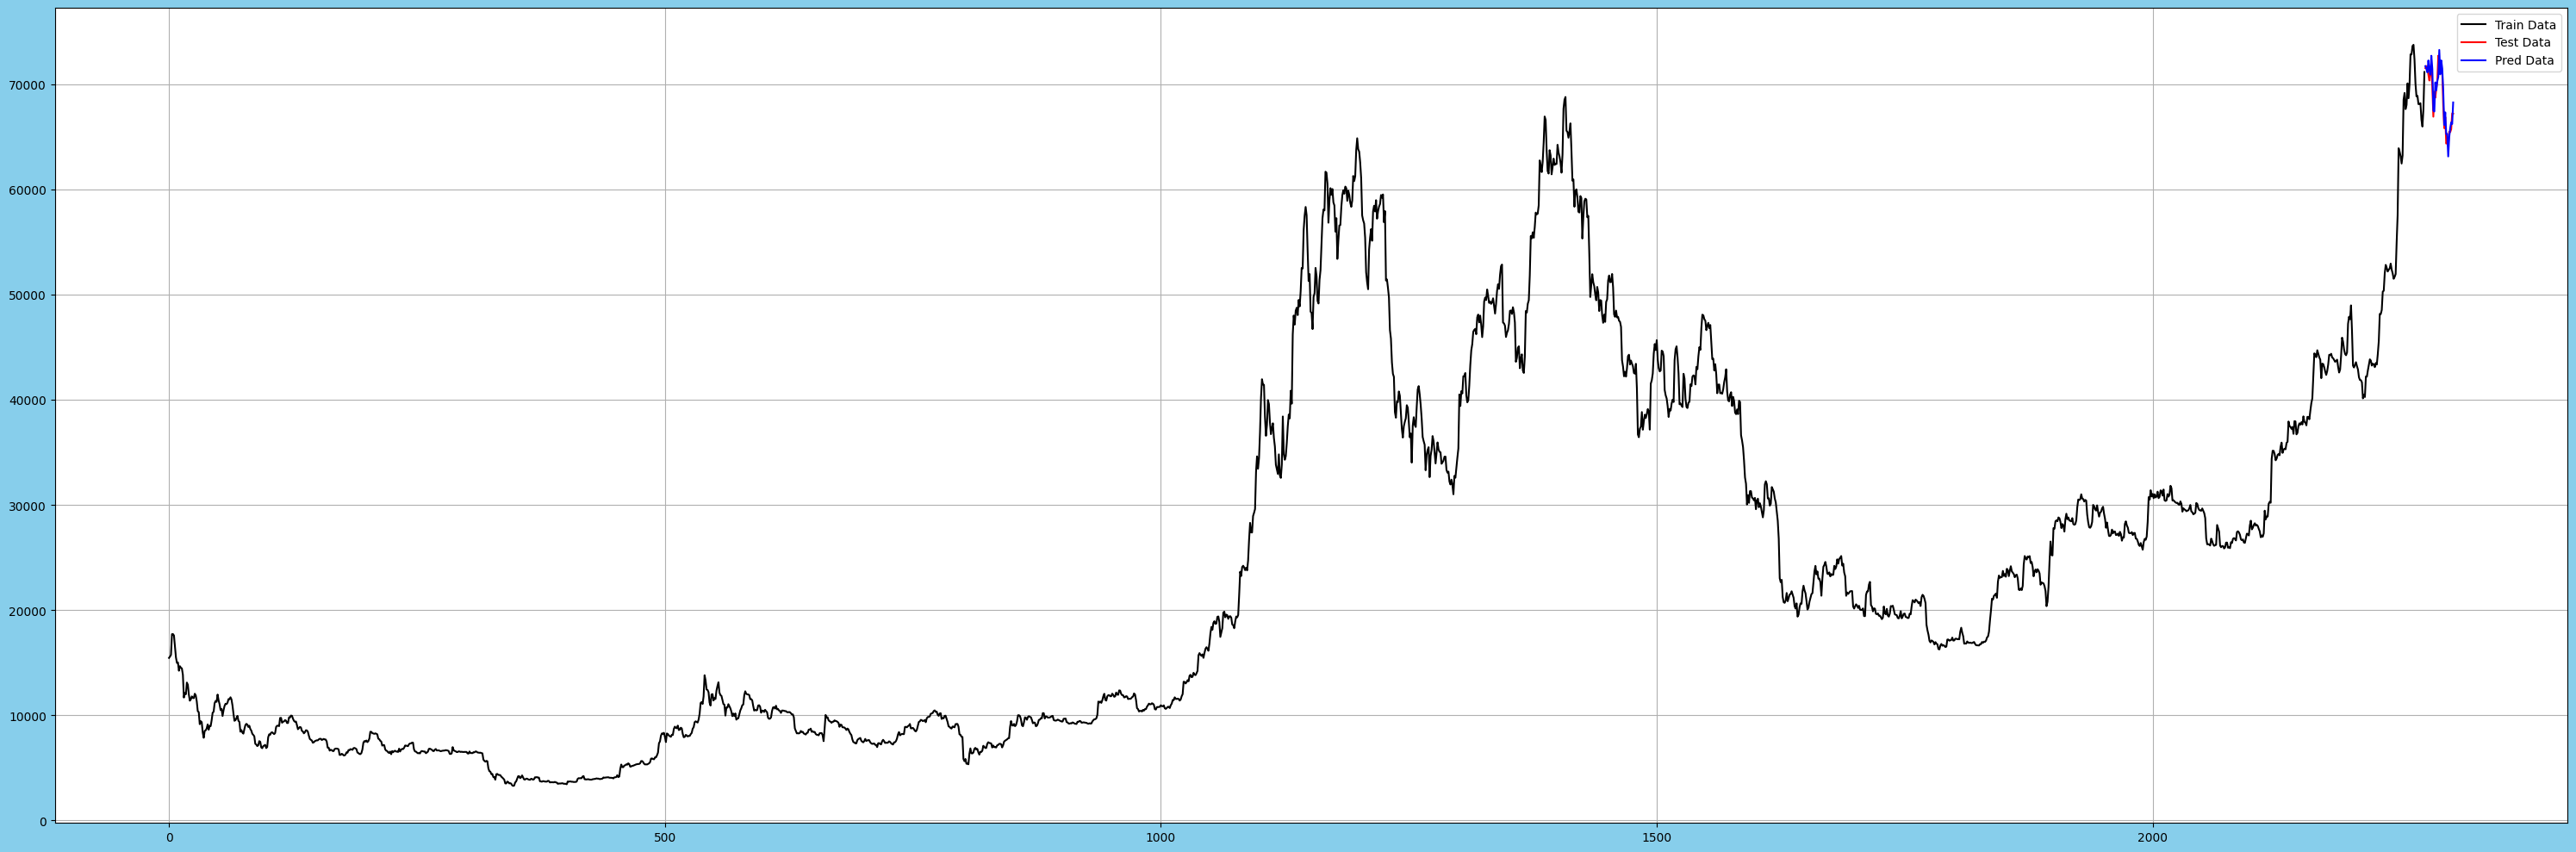

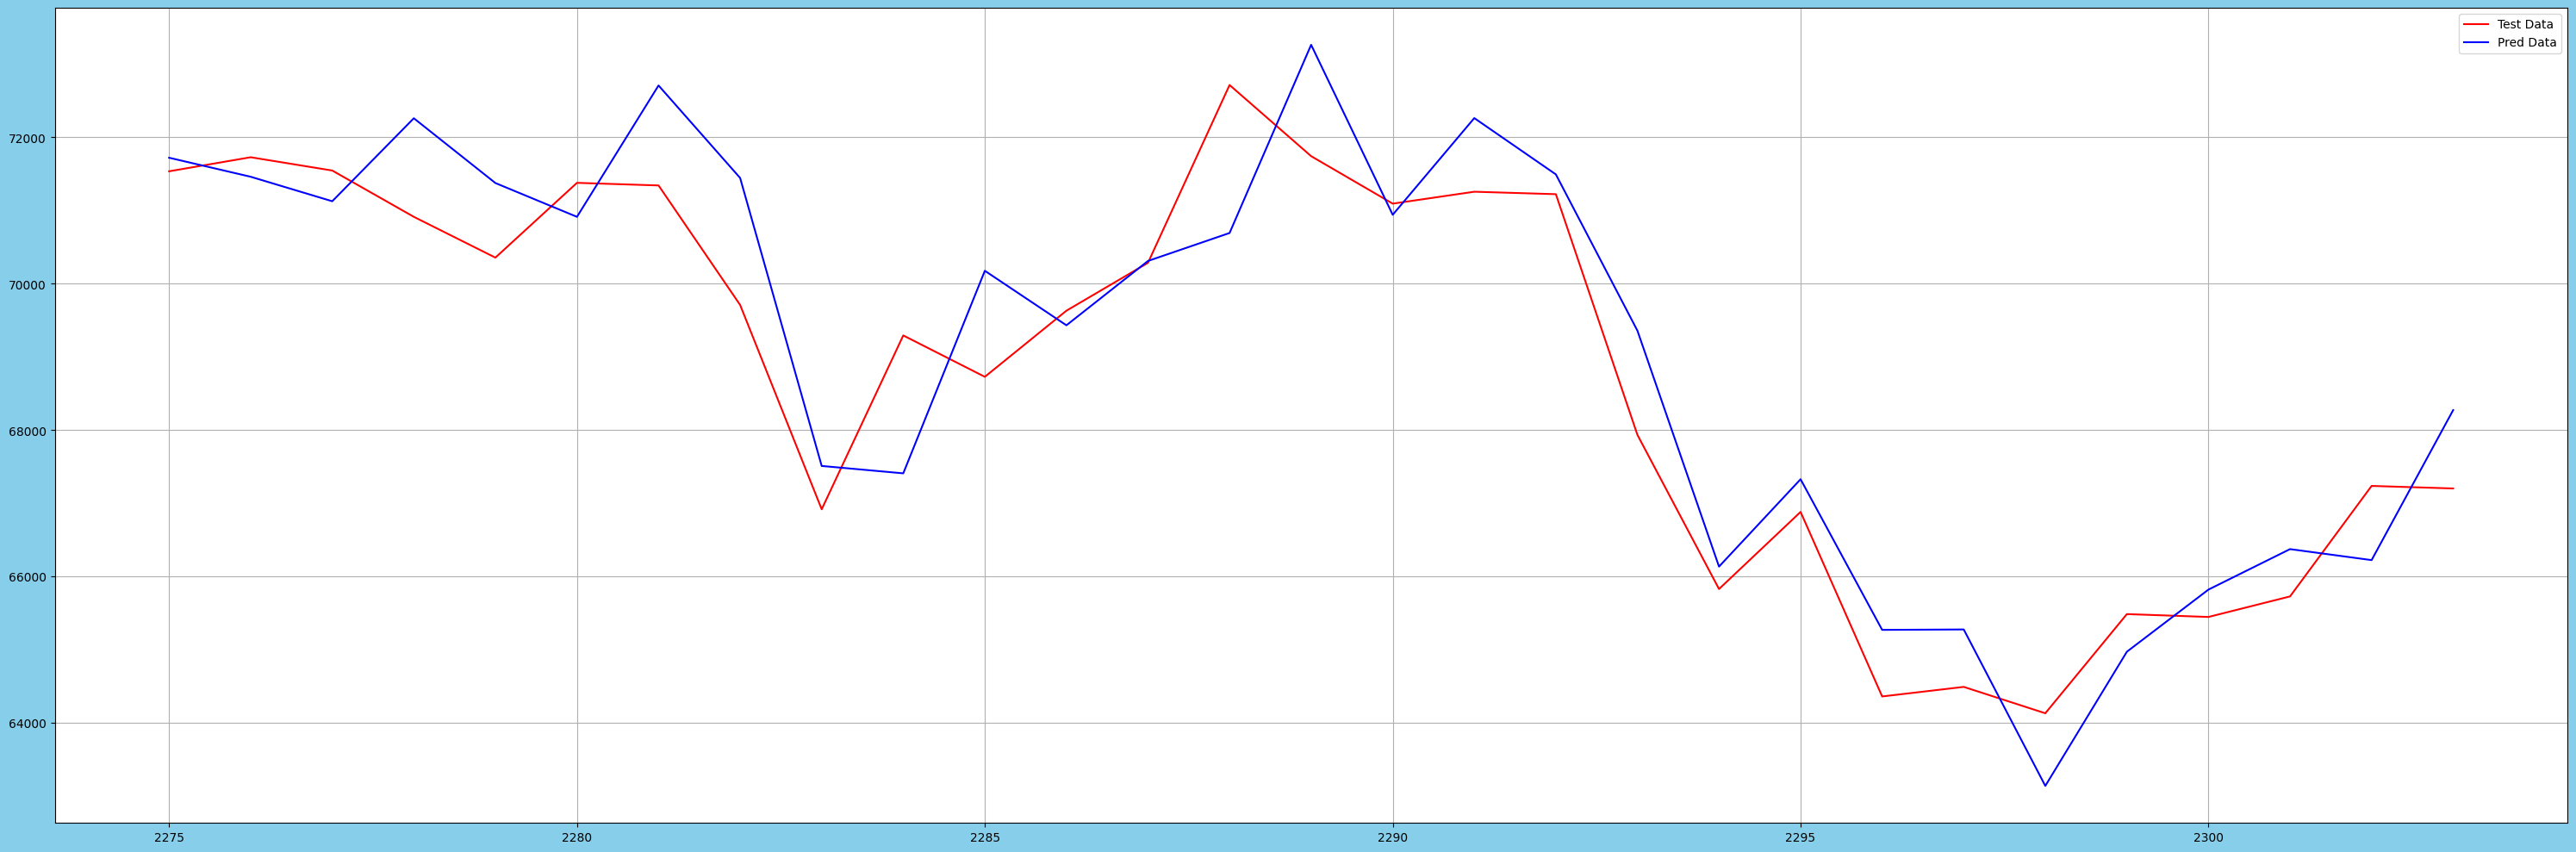

In [ ]:
## ライブラリのインポート
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(x_train,t_train)
print('学習データスコア：', model.score(x_train,t_train))
t_pred = model.predict(x_test)
print('検証データスコア：', model.score(x_test,t_test))

##平均絶対誤差(MAE)
mae = mean_absolute_error(t_test, t_pred)
print('MAE:', mae)

##平均絶対誤差の平方根
def rmae(t_test, t_pred):
  #実測値と予測値の差の絶対値を計算
  errors = np.abs(t_test - t_pred)
  #平均絶対誤差の平方根を計算
  rmae_value = np.sqrt(np.mean(errors))
  return rmae_value

print('RMAE:', rmae(t_test, t_pred))

## 結果の可視化
fig = plt.figure(figsize = (30,10),facecolor="skyblue", tight_layout=True)
x1 = t_train.index
x2 = t_test.index
y1 = t_train
y2 = t_test
y3 = t_pred
plt.grid(True)
plt.plot(x1,y1,color='k',label='Train Data')
plt.plot(x2,y2,color='r',label='Test Data')
plt.plot(x2,y3,color='b',label='Pred Data')
plt.legend()
plt.show()

## 結果の可視化
fig = plt.figure(figsize = (30,10),facecolor="skyblue", tight_layout=True)
x1 = t_train.index
x2 = t_test.index
y1 = t_train
y2 = t_test
y3 = t_pred
plt.grid(True)
#plt.plot(x1,y1,color='k',label='Train Data')
plt.plot(x2,y2,color='r',label='Test Data')
plt.plot(x2,y3,color='b',label='Pred Data')
plt.legend()
plt.show()